# Mini-Projeto 3

### Instalando e carregando Pacotes

In [1]:
# Instala o TensorFlow
!pip install tensorflow==2.5

In [2]:
# Instala o Pydot
!pip install -q pydot

In [3]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importando as bibliotecas do tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.5.0


# Carregando os Dados

Características:
 - Número de Observções: 506
 - Os primeiros 13 recursos são recursos preditivos numéricos / categóricos.
 - O último (atributo 14): o valor mediano é a variável de destino.

In [5]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [6]:
dataset_path

'C:\\Users\\bruna\\.keras\\datasets\\housing.data'

In [7]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [8]:
# Carrega os dados
dataset = pd.read_csv(dataset_path,
                     names = nomes_colunas,
                     na_values = '?',  #valores ausentes, preencher com interrogação
                     comment = '\t',   #comentários
                     sep = ' ', # separarar por espaços
                     skipinitialspace = True)

In [9]:
# Shape
dataset.shape

(506, 14)

In [10]:
# Visualizar os dados
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Vamos dividir os dados em treino e teste com proporção 80/20

In [11]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0) # Função sample permite fazer uma amostra com os dados, no caso 80%. O random é para ser aleatório
dados_teste = dataset.drop(dados_treino.index) #drop para retirar tudo que já está em treino

In [12]:
dados_treino.shape

(405, 14)

In [13]:
dados_teste.shape

(101, 14)

# Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

 - Variável independente: 'RM'
 - Variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos MEDV = f(RM) e queremos estimar a função f() usando regressão linear.

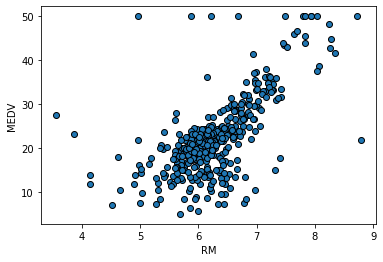

In [14]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Separando x e y

In [15]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

# Criação do Modelo

Queremos encontrar os parâmetros (W) que permitem prever a saída y a partir da entrada x:
    
    y = w1x + w0
    
A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:
    
    layers.Dense(1, use_bias= True, input_shape=(1,))

In [16]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])
    
    
    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01,  # taxa de aprendizado
                                        beta_1 = 0.9,
                                        beta_2 = 0.99,
                                        epsilon = 1e-05,
                                        amsgrad = False,
                                        name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse',
                 optimizer = optimizer,
                  metrics = ['mae', 'mse'])
    
    
    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [17]:
# Cria o modelo
modelo = modelo_linear()

In [18]:
!pip install pydot
!pip install graphviz

In [19]:
# Plot do modelo
tf.keras.utils.plot_model(modelo,
                         to_file = 'imagens/modelo.png',
                         show_shapes = True,
                         show_layer_names = True,
                         rankdir = 'TB',
                         expand_nested = False,
                         dpi = 100)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# Treinamento do Modelo

In [20]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [21]:
#Callback
#Técnica para evitar que o modelo aprenda muito
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                patience = n_idle_epochs,
                                                min_delta = 0.001)

In [22]:
# Lista pra receber as previsões
predictions_list = []

In [23]:
checkpoint_path = 'dados/'

In [24]:
# salvando os modelos de tempos em tempos
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = 'dados/',
                                                       verbose = 1,
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [25]:
# salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [26]:
#Treinamento
history = modelo.fit(x_treino,
                    y_treino,
                    batch_size = batch_size,
                    epochs = n_epochs,
                    validation_split = 0.1, #10% para validação
                    verbose = 1,
                    callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 1s 184ms/step - loss: 665.5141 - mae: 24.2195 - mse: 665.5141 - val_loss: 759.0221 - val_mae: 25.4951 - val_mse: 759.0221
Epoch 2/4000
2/2 [==============================] - 0s 25ms/step - loss: 658.3387 - mae: 24.0742 - mse: 658.3387 - val_loss: 751.4706 - val_mae: 25.3492 - val_mse: 751.4706
Epoch 3/4000
2/2 [==============================] - 0s 24ms/step - loss: 651.1941 - mae: 23.9288 - mse: 651.1941 - val_loss: 743.9667 - val_mae: 25.2034 - val_mse: 743.9667
Epoch 4/4000
2/2 [==============================] - 0s 16ms/step - loss: 644.1099 - mae: 23.7838 - mse: 644.1099 - val_loss: 736.5116 - val_mae: 25.0578 - val_mse: 736.5116
Epoch 5/4000
2/2 [==============================] - 0s 16ms/step - loss: 637.0942 - mae: 23.6388 - mse: 637.0942 - val_loss: 729.1101 - val_mae: 24.9123 - val_mse: 729.1101
Epoch 6/4000
2/2 [==============================] - 0s 24ms/step - loss: 630.0483 - mae: 23.4938 - mse: 630.0483 - val_loss: 721.7631 

2/2 [==============================] - 0s 16ms/step - loss: 384.2265 - mae: 17.6798 - mse: 384.2265 - val_loss: 462.1630 - val_mae: 18.9424 - val_mse: 462.1630
Epoch 49/4000
2/2 [==============================] - 0s 24ms/step - loss: 379.5136 - mae: 17.5499 - mse: 379.5136 - val_loss: 457.1458 - val_mae: 18.8123 - val_mse: 457.1458
Epoch 50/4000
2/2 [==============================] - 0s 16ms/step - loss: 374.8292 - mae: 17.4204 - mse: 374.8292 - val_loss: 452.1825 - val_mae: 18.6828 - val_mse: 452.1825
Epoch 51/4000
2/2 [==============================] - 0s 15ms/step - loss: 370.1990 - mae: 17.2913 - mse: 370.1990 - val_loss: 447.2650 - val_mae: 18.5535 - val_mse: 447.2650
Epoch 52/4000
2/2 [==============================] - 0s 32ms/step - loss: 365.6561 - mae: 17.1626 - mse: 365.6561 - val_loss: 442.3909 - val_mae: 18.4245 - val_mse: 442.3909
Epoch 53/4000
2/2 [==============================] - 0s 33ms/step - loss: 361.0868 - mae: 17.0338 - mse: 361.0868 - val_loss: 437.5656 - val_mae

2/2 [==============================] - 0s 16ms/step - loss: 212.2089 - mae: 12.2676 - mse: 212.2089 - val_loss: 277.1877 - val_mae: 13.5600 - val_mse: 277.1877
Epoch 95/4000
2/2 [==============================] - 0s 16ms/step - loss: 209.3824 - mae: 12.1665 - mse: 209.3824 - val_loss: 274.1234 - val_mae: 13.4584 - val_mse: 274.1234
Epoch 96/4000
2/2 [==============================] - 0s 22ms/step - loss: 206.6164 - mae: 12.0638 - mse: 206.6164 - val_loss: 271.0902 - val_mae: 13.3597 - val_mse: 271.0902
Epoch 97/4000
2/2 [==============================] - 0s 24ms/step - loss: 203.8587 - mae: 11.9618 - mse: 203.8587 - val_loss: 268.0895 - val_mae: 13.2641 - val_mse: 268.0895
Epoch 98/4000
2/2 [==============================] - 0s 16ms/step - loss: 201.1314 - mae: 11.8607 - mse: 201.1314 - val_loss: 265.1153 - val_mae: 13.1685 - val_mse: 265.1153
Epoch 99/4000
2/2 [==============================] - 0s 16ms/step - loss: 198.4626 - mae: 11.7592 - mse: 198.4626 - val_loss: 262.1652 - val_mae

Epoch 141/4000
2/2 [==============================] - 0s 24ms/step - loss: 114.1515 - mae: 8.2560 - mse: 114.1515 - val_loss: 168.0588 - val_mae: 9.7173 - val_mse: 168.0588
Epoch 142/4000
2/2 [==============================] - 0s 24ms/step - loss: 112.7451 - mae: 8.1935 - mse: 112.7451 - val_loss: 166.4430 - val_mae: 9.6520 - val_mse: 166.4430
Epoch 143/4000
2/2 [==============================] - 0s 40ms/step - loss: 111.3936 - mae: 8.1317 - mse: 111.3936 - val_loss: 164.8496 - val_mae: 9.5868 - val_mse: 164.8496
Epoch 144/4000
2/2 [==============================] - 0s 41ms/step - loss: 110.0138 - mae: 8.0707 - mse: 110.0138 - val_loss: 163.2877 - val_mae: 9.5223 - val_mse: 163.2877
Epoch 145/4000
2/2 [==============================] - 0s 30ms/step - loss: 108.6328 - mae: 8.0083 - mse: 108.6328 - val_loss: 161.7454 - val_mae: 9.4615 - val_mse: 161.7454
Epoch 146/4000
2/2 [==============================] - 0s 24ms/step - loss: 107.3539 - mae: 7.9481 - mse: 107.3539 - val_loss: 160.2097 

2/2 [==============================] - 0s 16ms/step - loss: 70.4263 - mae: 6.0633 - mse: 70.4263 - val_loss: 115.7309 - val_mae: 7.6420 - val_mse: 115.7309
Epoch 189/4000
2/2 [==============================] - 0s 16ms/step - loss: 69.9168 - mae: 6.0327 - mse: 69.9168 - val_loss: 115.0572 - val_mae: 7.6153 - val_mse: 115.0572
Epoch 190/4000
2/2 [==============================] - 0s 24ms/step - loss: 69.4171 - mae: 6.0032 - mse: 69.4171 - val_loss: 114.3999 - val_mae: 7.5890 - val_mse: 114.3999
Epoch 191/4000
2/2 [==============================] - 0s 24ms/step - loss: 68.9097 - mae: 5.9717 - mse: 68.9097 - val_loss: 113.7594 - val_mae: 7.5630 - val_mse: 113.7594
Epoch 192/4000
2/2 [==============================] - 0s 16ms/step - loss: 68.4382 - mae: 5.9425 - mse: 68.4382 - val_loss: 113.1297 - val_mae: 7.5371 - val_mse: 113.1297
Epoch 193/4000
2/2 [==============================] - 0s 16ms/step - loss: 67.9764 - mae: 5.9145 - mse: 67.9764 - val_loss: 112.5141 - val_mae: 7.5113 - val_mse

Epoch 236/4000
2/2 [==============================] - 0s 24ms/step - loss: 57.2430 - mae: 5.2999 - mse: 57.2430 - val_loss: 96.7618 - val_mae: 6.8994 - val_mse: 96.7618
Epoch 237/4000
2/2 [==============================] - 0s 24ms/step - loss: 57.1575 - mae: 5.2966 - mse: 57.1575 - val_loss: 96.5803 - val_mae: 6.8934 - val_mse: 96.5803
Epoch 238/4000
2/2 [==============================] - 0s 16ms/step - loss: 57.0659 - mae: 5.2941 - mse: 57.0659 - val_loss: 96.4059 - val_mae: 6.8876 - val_mse: 96.4059
Epoch 239/4000
2/2 [==============================] - 0s 16ms/step - loss: 56.9799 - mae: 5.2916 - mse: 56.9799 - val_loss: 96.2385 - val_mae: 6.8819 - val_mse: 96.2385
Epoch 240/4000
2/2 [==============================] - 0s 24ms/step - loss: 56.8984 - mae: 5.2894 - mse: 56.8984 - val_loss: 96.0783 - val_mae: 6.8764 - val_mse: 96.0783
Epoch 241/4000
2/2 [==============================] - 0s 16ms/step - loss: 56.8209 - mae: 5.2881 - mse: 56.8209 - val_loss: 95.9253 - val_mae: 6.8710 - val

2/2 [==============================] - 0s 24ms/step - loss: 55.5571 - mae: 5.3103 - mse: 55.5571 - val_loss: 92.5850 - val_mae: 6.8193 - val_mse: 92.5850
Epoch 285/4000
2/2 [==============================] - 0s 24ms/step - loss: 55.5599 - mae: 5.3123 - mse: 55.5599 - val_loss: 92.5488 - val_mae: 6.8191 - val_mse: 92.5488
Epoch 286/4000
2/2 [==============================] - 0s 24ms/step - loss: 55.5463 - mae: 5.3131 - mse: 55.5463 - val_loss: 92.5218 - val_mae: 6.8188 - val_mse: 92.5218
Epoch 287/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.5438 - mae: 5.3140 - mse: 55.5438 - val_loss: 92.4942 - val_mae: 6.8186 - val_mse: 92.4942
Epoch 288/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.5387 - mae: 5.3152 - mse: 55.5387 - val_loss: 92.4708 - val_mae: 6.8183 - val_mse: 92.4708
Epoch 289/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.5340 - mae: 5.3160 - mse: 55.5340 - val_loss: 92.4507 - val_mae: 6.8181 - val_mse: 92.4507
E

2/2 [==============================] - 0s 24ms/step - loss: 55.4151 - mae: 5.3383 - mse: 55.4151 - val_loss: 91.9228 - val_mae: 6.8099 - val_mse: 91.9228
Epoch 333/4000
2/2 [==============================] - 0s 24ms/step - loss: 55.4129 - mae: 5.3371 - mse: 55.4129 - val_loss: 91.9294 - val_mae: 6.8098 - val_mse: 91.9294
Epoch 334/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.4082 - mae: 5.3365 - mse: 55.4082 - val_loss: 91.9281 - val_mae: 6.8096 - val_mse: 91.9281
Epoch 335/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.4051 - mae: 5.3363 - mse: 55.4051 - val_loss: 91.9239 - val_mae: 6.8094 - val_mse: 91.9239
Epoch 336/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.4041 - mae: 5.3365 - mse: 55.4041 - val_loss: 91.9200 - val_mae: 6.8093 - val_mse: 91.9200
Epoch 337/4000
2/2 [==============================] - 0s 20ms/step - loss: 55.4020 - mae: 5.3362 - mse: 55.4020 - val_loss: 91.9237 - val_mae: 6.8091 - val_mse: 91.9237
E

2/2 [==============================] - 0s 17ms/step - loss: 55.2434 - mae: 5.3251 - mse: 55.2434 - val_loss: 91.8402 - val_mae: 6.8007 - val_mse: 91.8402
Epoch 381/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.2394 - mae: 5.3250 - mse: 55.2394 - val_loss: 91.8329 - val_mae: 6.8005 - val_mse: 91.8329
Epoch 382/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.2363 - mae: 5.3253 - mse: 55.2363 - val_loss: 91.8216 - val_mae: 6.8002 - val_mse: 91.8216
Epoch 383/4000
2/2 [==============================] - 0s 24ms/step - loss: 55.2310 - mae: 5.3252 - mse: 55.2310 - val_loss: 91.8188 - val_mae: 6.7999 - val_mse: 91.8188
Epoch 384/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.2261 - mae: 5.3250 - mse: 55.2261 - val_loss: 91.8121 - val_mae: 6.7996 - val_mse: 91.8121
Epoch 385/4000
2/2 [==============================] - 0s 16ms/step - loss: 55.2228 - mae: 5.3251 - mse: 55.2228 - val_loss: 91.8064 - val_mae: 6.7994 - val_mse: 91.8064
E

2/2 [==============================] - 0s 16ms/step - loss: 54.9996 - mae: 5.3167 - mse: 54.9996 - val_loss: 91.5825 - val_mae: 6.7864 - val_mse: 91.5825
Epoch 429/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.9942 - mae: 5.3165 - mse: 54.9942 - val_loss: 91.5837 - val_mae: 6.7861 - val_mse: 91.5837
Epoch 430/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.9883 - mae: 5.3158 - mse: 54.9883 - val_loss: 91.5995 - val_mae: 6.7859 - val_mse: 91.5995
Epoch 431/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.9797 - mae: 5.3135 - mse: 54.9797 - val_loss: 91.6367 - val_mae: 6.7859 - val_mse: 91.6367
Epoch 432/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.9728 - mae: 5.3106 - mse: 54.9728 - val_loss: 91.6712 - val_mae: 6.7858 - val_mse: 91.6712
Epoch 433/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.9659 - mae: 5.3076 - mse: 54.9659 - val_loss: 91.7030 - val_mae: 6.7857 - val_mse: 91.7030
E

2/2 [==============================] - 0s 24ms/step - loss: 54.6760 - mae: 5.2917 - mse: 54.6760 - val_loss: 91.4426 - val_mae: 6.7689 - val_mse: 91.4426
Epoch 477/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.6682 - mae: 5.2917 - mse: 54.6682 - val_loss: 91.4345 - val_mae: 6.7685 - val_mse: 91.4345
Epoch 478/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.6609 - mae: 5.2917 - mse: 54.6609 - val_loss: 91.4215 - val_mae: 6.7680 - val_mse: 91.4215
Epoch 479/4000
2/2 [==============================] - 0s 16ms/step - loss: 54.6559 - mae: 5.2914 - mse: 54.6559 - val_loss: 91.4152 - val_mae: 6.7676 - val_mse: 91.4152
Epoch 480/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.6504 - mae: 5.2918 - mse: 54.6504 - val_loss: 91.3934 - val_mae: 6.7670 - val_mse: 91.3934
Epoch 481/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.6394 - mae: 5.2917 - mse: 54.6394 - val_loss: 91.3936 - val_mae: 6.7666 - val_mse: 91.3936
E

2/2 [==============================] - 0s 32ms/step - loss: 54.2922 - mae: 5.2604 - mse: 54.2922 - val_loss: 91.2787 - val_mae: 6.7476 - val_mse: 91.2787
Epoch 525/4000
2/2 [==============================] - 0s 39ms/step - loss: 54.2782 - mae: 5.2627 - mse: 54.2782 - val_loss: 91.2335 - val_mae: 6.7469 - val_mse: 91.2335
Epoch 526/4000
2/2 [==============================] - 0s 41ms/step - loss: 54.2706 - mae: 5.2647 - mse: 54.2706 - val_loss: 91.1837 - val_mae: 6.7461 - val_mse: 91.1837
Epoch 527/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.2706 - mae: 5.2674 - mse: 54.2706 - val_loss: 91.1501 - val_mae: 6.7454 - val_mse: 91.1501
Epoch 528/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.2541 - mae: 5.2678 - mse: 54.2541 - val_loss: 91.1520 - val_mae: 6.7450 - val_mse: 91.1520
Epoch 529/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.2460 - mae: 5.2665 - mse: 54.2460 - val_loss: 91.1575 - val_mae: 6.7446 - val_mse: 91.1575
E

2/2 [==============================] - 0s 16ms/step - loss: 53.8575 - mae: 5.2375 - mse: 53.8575 - val_loss: 91.0193 - val_mae: 6.7231 - val_mse: 91.0193
Epoch 573/4000
2/2 [==============================] - 0s 16ms/step - loss: 53.8533 - mae: 5.2345 - mse: 53.8533 - val_loss: 91.0460 - val_mae: 6.7228 - val_mse: 91.0460
Epoch 574/4000
2/2 [==============================] - 0s 16ms/step - loss: 53.8419 - mae: 5.2327 - mse: 53.8419 - val_loss: 91.0434 - val_mae: 6.7223 - val_mse: 91.0434
Epoch 575/4000
2/2 [==============================] - 0s 16ms/step - loss: 53.8344 - mae: 5.2323 - mse: 53.8344 - val_loss: 91.0331 - val_mae: 6.7217 - val_mse: 91.0331
Epoch 576/4000
2/2 [==============================] - 0s 16ms/step - loss: 53.8235 - mae: 5.2316 - mse: 53.8235 - val_loss: 91.0376 - val_mae: 6.7212 - val_mse: 91.0376
Epoch 577/4000
2/2 [==============================] - 0s 24ms/step - loss: 53.8141 - mae: 5.2305 - mse: 53.8141 - val_loss: 91.0423 - val_mae: 6.7207 - val_mse: 91.0423
E

2/2 [==============================] - 0s 18ms/step - loss: 53.4019 - mae: 5.2069 - mse: 53.4019 - val_loss: 90.7839 - val_mae: 6.6966 - val_mse: 90.7839
Epoch 621/4000
2/2 [==============================] - 0s 24ms/step - loss: 53.3917 - mae: 5.2032 - mse: 53.3917 - val_loss: 90.8201 - val_mae: 6.6963 - val_mse: 90.8201
Epoch 622/4000
2/2 [==============================] - 0s 14ms/step - loss: 53.3856 - mae: 5.2008 - mse: 53.3856 - val_loss: 90.8533 - val_mae: 6.6960 - val_mse: 90.8533
Epoch 623/4000
2/2 [==============================] - 0s 16ms/step - loss: 53.3822 - mae: 5.1984 - mse: 53.3822 - val_loss: 90.8664 - val_mae: 6.6956 - val_mse: 90.8664
Epoch 624/4000
2/2 [==============================] - 0s 16ms/step - loss: 53.3742 - mae: 5.1978 - mse: 53.3742 - val_loss: 90.8460 - val_mae: 6.6949 - val_mse: 90.8460
Epoch 625/4000
2/2 [==============================] - 0s 16ms/step - loss: 53.3621 - mae: 5.1973 - mse: 53.3621 - val_loss: 90.8295 - val_mae: 6.6943 - val_mse: 90.8295
E

2/2 [==============================] - 0s 20ms/step - loss: 52.9471 - mae: 5.1861 - mse: 52.9471 - val_loss: 90.3772 - val_mae: 6.6688 - val_mse: 90.3772
Epoch 669/4000
2/2 [==============================] - 0s 19ms/step - loss: 52.9315 - mae: 5.1806 - mse: 52.9315 - val_loss: 90.4253 - val_mae: 6.6686 - val_mse: 90.4253
Epoch 670/4000
2/2 [==============================] - 0s 17ms/step - loss: 52.9235 - mae: 5.1774 - mse: 52.9235 - val_loss: 90.4633 - val_mae: 6.6683 - val_mse: 90.4633
Epoch 671/4000
2/2 [==============================] - 0s 24ms/step - loss: 52.9227 - mae: 5.1750 - mse: 52.9227 - val_loss: 90.4974 - val_mae: 6.6680 - val_mse: 90.4974
Epoch 672/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.9111 - mae: 5.1727 - mse: 52.9111 - val_loss: 90.4897 - val_mae: 6.6674 - val_mse: 90.4897
Epoch 673/4000
2/2 [==============================] - 0s 18ms/step - loss: 52.9046 - mae: 5.1726 - mse: 52.9046 - val_loss: 90.4662 - val_mae: 6.6667 - val_mse: 90.4662
E

2/2 [==============================] - 0s 16ms/step - loss: 52.5126 - mae: 5.1710 - mse: 52.5126 - val_loss: 89.7979 - val_mae: 6.6405 - val_mse: 89.7979
Epoch 717/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.5019 - mae: 5.1738 - mse: 52.5019 - val_loss: 89.7491 - val_mae: 6.6396 - val_mse: 89.7491
Epoch 718/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.4992 - mae: 5.1769 - mse: 52.4992 - val_loss: 89.6874 - val_mae: 6.6386 - val_mse: 89.6874
Epoch 719/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.4931 - mae: 5.1801 - mse: 52.4931 - val_loss: 89.6492 - val_mae: 6.6378 - val_mse: 89.6492
Epoch 720/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.4956 - mae: 5.1826 - mse: 52.4956 - val_loss: 89.6182 - val_mae: 6.6371 - val_mse: 89.6182
Epoch 721/4000
2/2 [==============================] - 0s 24ms/step - loss: 52.4836 - mae: 5.1831 - mse: 52.4836 - val_loss: 89.6298 - val_mae: 6.6366 - val_mse: 89.6298
E

2/2 [==============================] - 0s 24ms/step - loss: 52.0980 - mae: 5.1429 - mse: 52.0980 - val_loss: 89.5606 - val_mae: 6.6155 - val_mse: 89.5606
Epoch 765/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.1132 - mae: 5.1483 - mse: 52.1132 - val_loss: 89.5206 - val_mae: 6.6147 - val_mse: 89.5206
Epoch 766/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.0857 - mae: 5.1477 - mse: 52.0857 - val_loss: 89.5454 - val_mae: 6.6144 - val_mse: 89.5454
Epoch 767/4000
2/2 [==============================] - 0s 16ms/step - loss: 52.0893 - mae: 5.1452 - mse: 52.0893 - val_loss: 89.5784 - val_mae: 6.6142 - val_mse: 89.5784
Epoch 768/4000
2/2 [==============================] - 0s 24ms/step - loss: 52.0666 - mae: 5.1420 - mse: 52.0666 - val_loss: 89.5755 - val_mae: 6.6137 - val_mse: 89.5755
Epoch 769/4000
2/2 [==============================] - 0s 24ms/step - loss: 52.0603 - mae: 5.1415 - mse: 52.0603 - val_loss: 89.5899 - val_mae: 6.6134 - val_mse: 89.5899
E

2/2 [==============================] - 0s 46ms/step - loss: 51.7162 - mae: 5.1282 - mse: 51.7162 - val_loss: 89.2000 - val_mae: 6.5901 - val_mse: 89.2000
Epoch 813/4000
2/2 [==============================] - 0s 56ms/step - loss: 51.7100 - mae: 5.1288 - mse: 51.7100 - val_loss: 89.1916 - val_mae: 6.5896 - val_mse: 89.1916
Epoch 814/4000
2/2 [==============================] - 0s 24ms/step - loss: 51.7036 - mae: 5.1278 - mse: 51.7036 - val_loss: 89.2050 - val_mae: 6.5892 - val_mse: 89.2050
Epoch 815/4000
2/2 [==============================] - 0s 16ms/step - loss: 51.6900 - mae: 5.1261 - mse: 51.6900 - val_loss: 89.2107 - val_mae: 6.5887 - val_mse: 89.2107
Epoch 816/4000
2/2 [==============================] - 0s 24ms/step - loss: 51.6823 - mae: 5.1246 - mse: 51.6823 - val_loss: 89.2318 - val_mae: 6.5884 - val_mse: 89.2318
Epoch 817/4000
2/2 [==============================] - 0s 32ms/step - loss: 51.6703 - mae: 5.1223 - mse: 51.6703 - val_loss: 89.2560 - val_mae: 6.5881 - val_mse: 89.2560
E

2/2 [==============================] - 0s 24ms/step - loss: 51.3170 - mae: 5.1057 - mse: 51.3170 - val_loss: 88.8852 - val_mae: 6.5641 - val_mse: 88.8852
Epoch 861/4000
2/2 [==============================] - 0s 16ms/step - loss: 51.3124 - mae: 5.1061 - mse: 51.3124 - val_loss: 88.8772 - val_mae: 6.5637 - val_mse: 88.8772
Epoch 862/4000
2/2 [==============================] - 0s 16ms/step - loss: 51.3051 - mae: 5.1053 - mse: 51.3051 - val_loss: 88.8944 - val_mae: 6.5630 - val_mse: 88.8944
Epoch 863/4000
2/2 [==============================] - 0s 16ms/step - loss: 51.2911 - mae: 5.1034 - mse: 51.2911 - val_loss: 88.9055 - val_mae: 6.5626 - val_mse: 88.9055
Epoch 864/4000
2/2 [==============================] - 0s 17ms/step - loss: 51.2799 - mae: 5.1015 - mse: 51.2799 - val_loss: 88.9422 - val_mae: 6.5624 - val_mse: 88.9422
Epoch 865/4000
2/2 [==============================] - 0s 24ms/step - loss: 51.2665 - mae: 5.0975 - mse: 51.2665 - val_loss: 89.0107 - val_mae: 6.5624 - val_mse: 89.0107
E

2/2 [==============================] - 0s 24ms/step - loss: 50.8983 - mae: 5.0662 - mse: 50.8983 - val_loss: 88.8767 - val_mae: 6.5395 - val_mse: 88.8767
Epoch 909/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.8998 - mae: 5.0634 - mse: 50.8998 - val_loss: 88.9242 - val_mae: 6.5393 - val_mse: 88.9242
Epoch 910/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.8833 - mae: 5.0601 - mse: 50.8833 - val_loss: 88.9382 - val_mae: 6.5389 - val_mse: 88.9382
Epoch 911/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.8797 - mae: 5.0581 - mse: 50.8797 - val_loss: 88.9618 - val_mae: 6.5386 - val_mse: 88.9618
Epoch 912/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.8678 - mae: 5.0562 - mse: 50.8678 - val_loss: 88.9472 - val_mae: 6.5380 - val_mse: 88.9472
Epoch 913/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.8590 - mae: 5.0566 - mse: 50.8590 - val_loss: 88.9098 - val_mae: 6.5372 - val_mse: 88.9098
E

2/2 [==============================] - 0s 28ms/step - loss: 50.5269 - mae: 5.0278 - mse: 50.5269 - val_loss: 88.8383 - val_mae: 6.5156 - val_mse: 88.8383
Epoch 957/4000
2/2 [==============================] - 0s 25ms/step - loss: 50.5170 - mae: 5.0281 - mse: 50.5170 - val_loss: 88.8099 - val_mae: 6.5150 - val_mse: 88.8099
Epoch 958/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.5079 - mae: 5.0291 - mse: 50.5079 - val_loss: 88.7749 - val_mae: 6.5142 - val_mse: 88.7749
Epoch 959/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.5005 - mae: 5.0299 - mse: 50.5005 - val_loss: 88.7340 - val_mae: 6.5135 - val_mse: 88.7340
Epoch 960/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.4893 - mae: 5.0313 - mse: 50.4893 - val_loss: 88.6987 - val_mae: 6.5128 - val_mse: 88.6987
Epoch 961/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.4830 - mae: 5.0325 - mse: 50.4830 - val_loss: 88.6612 - val_mae: 6.5120 - val_mse: 88.6612
E

2/2 [==============================] - 0s 16ms/step - loss: 50.1547 - mae: 5.0150 - mse: 50.1547 - val_loss: 88.4172 - val_mae: 6.4895 - val_mse: 88.4172
Epoch 1005/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.1459 - mae: 5.0144 - mse: 50.1459 - val_loss: 88.4214 - val_mae: 6.4891 - val_mse: 88.4214
Epoch 1006/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.1386 - mae: 5.0135 - mse: 50.1386 - val_loss: 88.4224 - val_mae: 6.4886 - val_mse: 88.4224
Epoch 1007/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.1298 - mae: 5.0126 - mse: 50.1298 - val_loss: 88.4268 - val_mae: 6.4881 - val_mse: 88.4268
Epoch 1008/4000
2/2 [==============================] - 0s 16ms/step - loss: 50.1246 - mae: 5.0119 - mse: 50.1246 - val_loss: 88.4398 - val_mae: 6.4877 - val_mse: 88.4398
Epoch 1009/4000
2/2 [==============================] - 0s 24ms/step - loss: 50.1167 - mae: 5.0098 - mse: 50.1167 - val_loss: 88.4762 - val_mae: 6.4874 - val_mse: 88.4

2/2 [==============================] - 0s 18ms/step - loss: 49.7843 - mae: 4.9909 - mse: 49.7843 - val_loss: 88.1912 - val_mae: 6.4640 - val_mse: 88.1912
Epoch 1053/4000
2/2 [==============================] - 0s 25ms/step - loss: 49.7766 - mae: 4.9902 - mse: 49.7766 - val_loss: 88.1927 - val_mae: 6.4635 - val_mse: 88.1927
Epoch 1054/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.7800 - mae: 4.9892 - mse: 49.7800 - val_loss: 88.1906 - val_mae: 6.4630 - val_mse: 88.1906
Epoch 1055/4000
2/2 [==============================] - 0s 16ms/step - loss: 49.7707 - mae: 4.9899 - mse: 49.7707 - val_loss: 88.1441 - val_mae: 6.4622 - val_mse: 88.1441
Epoch 1056/4000
2/2 [==============================] - 0s 16ms/step - loss: 49.7552 - mae: 4.9907 - mse: 49.7552 - val_loss: 88.1404 - val_mae: 6.4617 - val_mse: 88.1404
Epoch 1057/4000
2/2 [==============================] - 0s 16ms/step - loss: 49.7482 - mae: 4.9902 - mse: 49.7482 - val_loss: 88.1576 - val_mae: 6.4614 - val_mse: 88.1

2/2 [==============================] - 0s 24ms/step - loss: 49.4374 - mae: 4.9746 - mse: 49.4374 - val_loss: 87.8422 - val_mae: 6.4396 - val_mse: 87.8422
Epoch 1101/4000
2/2 [==============================] - 0s 32ms/step - loss: 49.4312 - mae: 4.9744 - mse: 49.4312 - val_loss: 87.8353 - val_mae: 6.4391 - val_mse: 87.8353
Epoch 1102/4000
2/2 [==============================] - 0s 25ms/step - loss: 49.4240 - mae: 4.9741 - mse: 49.4240 - val_loss: 87.8159 - val_mae: 6.4389 - val_mse: 87.8159
Epoch 1103/4000
2/2 [==============================] - 0s 24ms/step - loss: 49.4184 - mae: 4.9746 - mse: 49.4184 - val_loss: 87.7877 - val_mae: 6.4387 - val_mse: 87.7877
Epoch 1104/4000
2/2 [==============================] - 0s 32ms/step - loss: 49.4157 - mae: 4.9756 - mse: 49.4157 - val_loss: 87.7875 - val_mae: 6.4382 - val_mse: 87.7875
Epoch 1105/4000
2/2 [==============================] - 0s 28ms/step - loss: 49.4060 - mae: 4.9746 - mse: 49.4060 - val_loss: 87.8225 - val_mae: 6.4371 - val_mse: 87.8

2/2 [==============================] - 0s 40ms/step - loss: 49.0996 - mae: 4.9470 - mse: 49.0996 - val_loss: 87.7637 - val_mae: 6.4181 - val_mse: 87.7637
Epoch 1149/4000
2/2 [==============================] - 0s 27ms/step - loss: 49.0938 - mae: 4.9451 - mse: 49.0938 - val_loss: 87.7955 - val_mae: 6.4193 - val_mse: 87.7955
Epoch 1150/4000
2/2 [==============================] - 0s 32ms/step - loss: 49.0880 - mae: 4.9430 - mse: 49.0880 - val_loss: 87.8189 - val_mae: 6.4202 - val_mse: 87.8189
Epoch 1151/4000
2/2 [==============================] - 0s 32ms/step - loss: 49.0830 - mae: 4.9417 - mse: 49.0830 - val_loss: 87.8350 - val_mae: 6.4207 - val_mse: 87.8350
Epoch 1152/4000
2/2 [==============================] - 0s 40ms/step - loss: 49.0765 - mae: 4.9401 - mse: 49.0765 - val_loss: 87.8672 - val_mae: 6.4218 - val_mse: 87.8672
Epoch 1153/4000
2/2 [==============================] - 0s 32ms/step - loss: 49.0712 - mae: 4.9381 - mse: 49.0712 - val_loss: 87.8775 - val_mae: 6.4221 - val_mse: 87.8

Epoch 1196/4000
2/2 [==============================] - 0s 25ms/step - loss: 48.7935 - mae: 4.9184 - mse: 48.7935 - val_loss: 87.7568 - val_mae: 6.4094 - val_mse: 87.7568
Epoch 1197/4000
2/2 [==============================] - 0s 16ms/step - loss: 48.7876 - mae: 4.9165 - mse: 48.7876 - val_loss: 87.7660 - val_mae: 6.4096 - val_mse: 87.7660
Epoch 1198/4000
2/2 [==============================] - 0s 16ms/step - loss: 48.7891 - mae: 4.9157 - mse: 48.7891 - val_loss: 87.7743 - val_mae: 6.4097 - val_mse: 87.7743
Epoch 1199/4000
2/2 [==============================] - 0s 28ms/step - loss: 48.7744 - mae: 4.9148 - mse: 48.7744 - val_loss: 87.7262 - val_mae: 6.4076 - val_mse: 87.7262
Epoch 1200/4000
2/2 [==============================] - 0s 40ms/step - loss: 48.7692 - mae: 4.9162 - mse: 48.7692 - val_loss: 87.6727 - val_mae: 6.4051 - val_mse: 87.6727
Epoch 1201/4000
2/2 [==============================] - 0s 40ms/step - loss: 48.7549 - mae: 4.9175 - mse: 48.7549 - val_loss: 87.6342 - val_mae: 6.4033

2/2 [==============================] - 0s 40ms/step - loss: 48.4975 - mae: 4.9278 - mse: 48.4975 - val_loss: 86.9471 - val_mae: 6.3791 - val_mse: 86.9471
Epoch 1245/4000
2/2 [==============================] - 0s 40ms/step - loss: 48.4909 - mae: 4.9274 - mse: 48.4909 - val_loss: 86.9645 - val_mae: 6.3788 - val_mse: 86.9645
Epoch 1246/4000
2/2 [==============================] - 0s 42ms/step - loss: 48.4799 - mae: 4.9251 - mse: 48.4799 - val_loss: 87.0083 - val_mae: 6.3786 - val_mse: 87.0083
Epoch 1247/4000
2/2 [==============================] - 0s 40ms/step - loss: 48.4649 - mae: 4.9210 - mse: 48.4649 - val_loss: 87.0665 - val_mae: 6.3784 - val_mse: 87.0665
Epoch 1248/4000
2/2 [==============================] - 0s 40ms/step - loss: 48.4552 - mae: 4.9164 - mse: 48.4552 - val_loss: 87.1359 - val_mae: 6.3784 - val_mse: 87.1359
Epoch 1249/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.4526 - mae: 4.9115 - mse: 48.4526 - val_loss: 87.1888 - val_mae: 6.3794 - val_mse: 87.1

2/2 [==============================] - 0s 19ms/step - loss: 48.1533 - mae: 4.8804 - mse: 48.1533 - val_loss: 87.2319 - val_mae: 6.3693 - val_mse: 87.2319
Epoch 1293/4000
2/2 [==============================] - 0s 16ms/step - loss: 48.1458 - mae: 4.8788 - mse: 48.1458 - val_loss: 87.2768 - val_mae: 6.3707 - val_mse: 87.2768
Epoch 1294/4000
2/2 [==============================] - 0s 16ms/step - loss: 48.1408 - mae: 4.8761 - mse: 48.1408 - val_loss: 87.3255 - val_mae: 6.3726 - val_mse: 87.3255
Epoch 1295/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.1385 - mae: 4.8740 - mse: 48.1385 - val_loss: 87.3767 - val_mae: 6.3745 - val_mse: 87.3767
Epoch 1296/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.1432 - mae: 4.8716 - mse: 48.1432 - val_loss: 87.4287 - val_mae: 6.3764 - val_mse: 87.4287
Epoch 1297/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.1374 - mae: 4.8697 - mse: 48.1374 - val_loss: 87.4310 - val_mae: 6.3763 - val_mse: 87.4

2/2 [==============================] - 0s 34ms/step - loss: 47.8391 - mae: 4.8641 - mse: 47.8391 - val_loss: 86.9046 - val_mae: 6.3494 - val_mse: 86.9046
Epoch 1341/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.8320 - mae: 4.8629 - mse: 47.8320 - val_loss: 86.9296 - val_mae: 6.3496 - val_mse: 86.9296
Epoch 1342/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.8247 - mae: 4.8611 - mse: 47.8247 - val_loss: 86.9321 - val_mae: 6.3494 - val_mse: 86.9321
Epoch 1343/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.8160 - mae: 4.8604 - mse: 47.8160 - val_loss: 86.9115 - val_mae: 6.3487 - val_mse: 86.9115
Epoch 1344/4000
2/2 [==============================] - 0s 40ms/step - loss: 47.8084 - mae: 4.8607 - mse: 47.8084 - val_loss: 86.8747 - val_mae: 6.3475 - val_mse: 86.8747
Epoch 1345/4000
2/2 [==============================] - 0s 21ms/step - loss: 47.8055 - mae: 4.8620 - mse: 47.8055 - val_loss: 86.8299 - val_mae: 6.3462 - val_mse: 86.8

Epoch 1388/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.5374 - mae: 4.8378 - mse: 47.5374 - val_loss: 86.8406 - val_mae: 6.3351 - val_mse: 86.8406
Epoch 1389/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.5243 - mae: 4.8365 - mse: 47.5243 - val_loss: 86.8088 - val_mae: 6.3342 - val_mse: 86.8088
Epoch 1390/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.5184 - mae: 4.8372 - mse: 47.5184 - val_loss: 86.7790 - val_mae: 6.3333 - val_mse: 86.7790
Epoch 1391/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.5112 - mae: 4.8379 - mse: 47.5112 - val_loss: 86.7498 - val_mae: 6.3324 - val_mse: 86.7498
Epoch 1392/4000
2/2 [==============================] - 0s 25ms/step - loss: 47.5032 - mae: 4.8387 - mse: 47.5032 - val_loss: 86.6985 - val_mae: 6.3310 - val_mse: 86.6985
Epoch 1393/4000
2/2 [==============================] - 0s 32ms/step - loss: 47.4988 - mae: 4.8410 - mse: 47.4988 - val_loss: 86.6341 - val_mae: 6.3292

2/2 [==============================] - 0s 16ms/step - loss: 47.2658 - mae: 4.8229 - mse: 47.2658 - val_loss: 86.5394 - val_mae: 6.3169 - val_mse: 86.5394
Epoch 1436/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.2569 - mae: 4.8241 - mse: 47.2569 - val_loss: 86.5157 - val_mae: 6.3162 - val_mse: 86.5157
Epoch 1437/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.2534 - mae: 4.8248 - mse: 47.2534 - val_loss: 86.5034 - val_mae: 6.3156 - val_mse: 86.5034
Epoch 1438/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.2493 - mae: 4.8247 - mse: 47.2493 - val_loss: 86.5043 - val_mae: 6.3154 - val_mse: 86.5043
Epoch 1439/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.2448 - mae: 4.8247 - mse: 47.2448 - val_loss: 86.4930 - val_mae: 6.3149 - val_mse: 86.4930
Epoch 1440/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.2399 - mae: 4.8240 - mse: 47.2399 - val_loss: 86.5049 - val_mae: 6.3150 - val_mse: 86.5

2/2 [==============================] - 0s 24ms/step - loss: 47.0196 - mae: 4.8026 - mse: 47.0196 - val_loss: 86.5281 - val_mae: 6.3059 - val_mse: 86.5281
Epoch 1484/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.0161 - mae: 4.8016 - mse: 47.0161 - val_loss: 86.5333 - val_mae: 6.3058 - val_mse: 86.5333
Epoch 1485/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.0117 - mae: 4.8010 - mse: 47.0117 - val_loss: 86.5158 - val_mae: 6.3052 - val_mse: 86.5158
Epoch 1486/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.0029 - mae: 4.8013 - mse: 47.0029 - val_loss: 86.4699 - val_mae: 6.3039 - val_mse: 86.4699
Epoch 1487/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.9959 - mae: 4.8028 - mse: 46.9959 - val_loss: 86.4141 - val_mae: 6.3025 - val_mse: 86.4141
Epoch 1488/4000
2/2 [==============================] - 0s 16ms/step - loss: 47.0072 - mae: 4.8057 - mse: 47.0072 - val_loss: 86.3630 - val_mae: 6.3011 - val_mse: 86.3

2/2 [==============================] - 0s 24ms/step - loss: 46.7819 - mae: 4.7911 - mse: 46.7819 - val_loss: 86.2673 - val_mae: 6.2892 - val_mse: 86.2673
Epoch 1532/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.7742 - mae: 4.7907 - mse: 46.7742 - val_loss: 86.2507 - val_mae: 6.2886 - val_mse: 86.2507
Epoch 1533/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.7700 - mae: 4.7909 - mse: 46.7700 - val_loss: 86.2295 - val_mae: 6.2879 - val_mse: 86.2295
Epoch 1534/4000
2/2 [==============================] - 0s 22ms/step - loss: 46.7648 - mae: 4.7915 - mse: 46.7648 - val_loss: 86.1921 - val_mae: 6.2868 - val_mse: 86.1921
Epoch 1535/4000
2/2 [==============================] - 0s 32ms/step - loss: 46.7607 - mae: 4.7926 - mse: 46.7607 - val_loss: 86.1574 - val_mae: 6.2858 - val_mse: 86.1574
Epoch 1536/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.7634 - mae: 4.7943 - mse: 46.7634 - val_loss: 86.1253 - val_mae: 6.2848 - val_mse: 86.1

Epoch 1579/4000
2/2 [==============================] - 0s 30ms/step - loss: 46.5766 - mae: 4.7910 - mse: 46.5766 - val_loss: 85.8452 - val_mae: 6.2686 - val_mse: 85.8452
Epoch 1580/4000
2/2 [==============================] - 0s 29ms/step - loss: 46.5676 - mae: 4.7894 - mse: 46.5676 - val_loss: 85.8872 - val_mae: 6.2695 - val_mse: 85.8872
Epoch 1581/4000
2/2 [==============================] - 0s 26ms/step - loss: 46.5679 - mae: 4.7869 - mse: 46.5679 - val_loss: 85.9308 - val_mae: 6.2704 - val_mse: 85.9308
Epoch 1582/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.5492 - mae: 4.7841 - mse: 46.5492 - val_loss: 85.9491 - val_mae: 6.2706 - val_mse: 85.9491
Epoch 1583/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.5417 - mae: 4.7828 - mse: 46.5417 - val_loss: 85.9716 - val_mae: 6.2709 - val_mse: 85.9716
Epoch 1584/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.5356 - mae: 4.7807 - mse: 46.5356 - val_loss: 86.0121 - val_mae: 6.2717

Epoch 1627/4000
2/2 [==============================] - 0s 30ms/step - loss: 46.3408 - mae: 4.7545 - mse: 46.3408 - val_loss: 86.1965 - val_mae: 6.2666 - val_mse: 86.1965
Epoch 1628/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.3376 - mae: 4.7538 - mse: 46.3376 - val_loss: 86.1974 - val_mae: 6.2664 - val_mse: 86.1974
Epoch 1629/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.3340 - mae: 4.7536 - mse: 46.3340 - val_loss: 86.1863 - val_mae: 6.2659 - val_mse: 86.1863
Epoch 1630/4000
2/2 [==============================] - 0s 25ms/step - loss: 46.3316 - mae: 4.7536 - mse: 46.3316 - val_loss: 86.1847 - val_mae: 6.2657 - val_mse: 86.1847
Epoch 1631/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.3243 - mae: 4.7530 - mse: 46.3243 - val_loss: 86.2031 - val_mae: 6.2659 - val_mse: 86.2031
Epoch 1632/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.3337 - mae: 4.7524 - mse: 46.3337 - val_loss: 86.2005 - val_mae: 6.2656

2/2 [==============================] - 0s 16ms/step - loss: 46.1413 - mae: 4.7386 - mse: 46.1413 - val_loss: 86.1313 - val_mae: 6.2548 - val_mse: 86.1313
Epoch 1676/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.1333 - mae: 4.7389 - mse: 46.1333 - val_loss: 86.1169 - val_mae: 6.2542 - val_mse: 86.1169
Epoch 1677/4000
2/2 [==============================] - 0s 24ms/step - loss: 46.1274 - mae: 4.7387 - mse: 46.1274 - val_loss: 86.0996 - val_mae: 6.2536 - val_mse: 86.0996
Epoch 1678/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.1215 - mae: 4.7387 - mse: 46.1215 - val_loss: 86.0690 - val_mae: 6.2527 - val_mse: 86.0690
Epoch 1679/4000
2/2 [==============================] - 0s 16ms/step - loss: 46.1141 - mae: 4.7392 - mse: 46.1141 - val_loss: 86.0240 - val_mae: 6.2515 - val_mse: 86.0240
Epoch 1680/4000
2/2 [==============================] - 0s 17ms/step - loss: 46.1075 - mae: 4.7403 - mse: 46.1075 - val_loss: 85.9669 - val_mae: 6.2500 - val_mse: 85.9

Epoch 1723/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.9090 - mae: 4.7330 - mse: 45.9090 - val_loss: 85.6513 - val_mae: 6.2328 - val_mse: 85.6513
Epoch 1724/4000
2/2 [==============================] - 0s 20ms/step - loss: 45.9051 - mae: 4.7360 - mse: 45.9051 - val_loss: 85.5869 - val_mae: 6.2310 - val_mse: 85.5869
Epoch 1725/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.9156 - mae: 4.7391 - mse: 45.9156 - val_loss: 85.5450 - val_mae: 6.2297 - val_mse: 85.5450
Epoch 1726/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.9050 - mae: 4.7400 - mse: 45.9050 - val_loss: 85.5472 - val_mae: 6.2296 - val_mse: 85.5472
Epoch 1727/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.9002 - mae: 4.7394 - mse: 45.9002 - val_loss: 85.5584 - val_mae: 6.2296 - val_mse: 85.5584
Epoch 1728/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.8944 - mae: 4.7384 - mse: 45.8944 - val_loss: 85.5777 - val_mae: 6.2299

Epoch 1771/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.7223 - mae: 4.7128 - mse: 45.7223 - val_loss: 85.8313 - val_mae: 6.2264 - val_mse: 85.8313
Epoch 1772/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.7095 - mae: 4.7119 - mse: 45.7095 - val_loss: 85.8123 - val_mae: 6.2258 - val_mse: 85.8123
Epoch 1773/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.7097 - mae: 4.7121 - mse: 45.7097 - val_loss: 85.7750 - val_mae: 6.2248 - val_mse: 85.7750
Epoch 1774/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.6964 - mae: 4.7128 - mse: 45.6964 - val_loss: 85.6870 - val_mae: 6.2226 - val_mse: 85.6870
Epoch 1775/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.7076 - mae: 4.7165 - mse: 45.7076 - val_loss: 85.6169 - val_mae: 6.2209 - val_mse: 85.6169
Epoch 1776/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.6935 - mae: 4.7177 - mse: 45.6935 - val_loss: 85.5990 - val_mae: 6.2202

2/2 [==============================] - 0s 24ms/step - loss: 45.5201 - mae: 4.7029 - mse: 45.5201 - val_loss: 85.5949 - val_mae: 6.2109 - val_mse: 85.5949
Epoch 1820/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.5143 - mae: 4.7024 - mse: 45.5143 - val_loss: 85.5836 - val_mae: 6.2105 - val_mse: 85.5836
Epoch 1821/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.5092 - mae: 4.7024 - mse: 45.5092 - val_loss: 85.5541 - val_mae: 6.2096 - val_mse: 85.5541
Epoch 1822/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.5081 - mae: 4.7028 - mse: 45.5081 - val_loss: 85.5108 - val_mae: 6.2084 - val_mse: 85.5108
Epoch 1823/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.5013 - mae: 4.7041 - mse: 45.5013 - val_loss: 85.4836 - val_mae: 6.2075 - val_mse: 85.4836
Epoch 1824/4000
2/2 [==============================] - 0s 25ms/step - loss: 45.5018 - mae: 4.7051 - mse: 45.5018 - val_loss: 85.4505 - val_mae: 6.2065 - val_mse: 85.4

2/2 [==============================] - 0s 24ms/step - loss: 45.3574 - mae: 4.6847 - mse: 45.3574 - val_loss: 85.7961 - val_mae: 6.2049 - val_mse: 85.7961
Epoch 1868/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.3483 - mae: 4.6845 - mse: 45.3483 - val_loss: 85.7274 - val_mae: 6.2033 - val_mse: 85.7274
Epoch 1869/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.3483 - mae: 4.6859 - mse: 45.3483 - val_loss: 85.6598 - val_mae: 6.2017 - val_mse: 85.6598
Epoch 1870/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.3310 - mae: 4.6856 - mse: 45.3310 - val_loss: 85.6238 - val_mae: 6.2007 - val_mse: 85.6238
Epoch 1871/4000
2/2 [==============================] - 0s 17ms/step - loss: 45.3261 - mae: 4.6860 - mse: 45.3261 - val_loss: 85.5928 - val_mae: 6.1998 - val_mse: 85.5928
Epoch 1872/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.3180 - mae: 4.6860 - mse: 45.3180 - val_loss: 85.5696 - val_mae: 6.1991 - val_mse: 85.5

2/2 [==============================] - 0s 16ms/step - loss: 45.1553 - mae: 4.6732 - mse: 45.1553 - val_loss: 85.6235 - val_mae: 6.1904 - val_mse: 85.6235
Epoch 1916/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.1536 - mae: 4.6727 - mse: 45.1536 - val_loss: 85.6272 - val_mae: 6.1902 - val_mse: 85.6272
Epoch 1917/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.1496 - mae: 4.6725 - mse: 45.1496 - val_loss: 85.6056 - val_mae: 6.1895 - val_mse: 85.6056
Epoch 1918/4000
2/2 [==============================] - 0s 33ms/step - loss: 45.1466 - mae: 4.6729 - mse: 45.1466 - val_loss: 85.5721 - val_mae: 6.1886 - val_mse: 85.5721
Epoch 1919/4000
2/2 [==============================] - 0s 16ms/step - loss: 45.1367 - mae: 4.6726 - mse: 45.1367 - val_loss: 85.5475 - val_mae: 6.1878 - val_mse: 85.5475
Epoch 1920/4000
2/2 [==============================] - 0s 24ms/step - loss: 45.1337 - mae: 4.6730 - mse: 45.1337 - val_loss: 85.5093 - val_mae: 6.1868 - val_mse: 85.5

2/2 [==============================] - 0s 42ms/step - loss: 44.9653 - mae: 4.6634 - mse: 44.9653 - val_loss: 85.4056 - val_mae: 6.1751 - val_mse: 85.4056
Epoch 1964/4000
2/2 [==============================] - 0s 40ms/step - loss: 44.9638 - mae: 4.6627 - mse: 44.9638 - val_loss: 85.4394 - val_mae: 6.1756 - val_mse: 85.4394
Epoch 1965/4000
2/2 [==============================] - 0s 48ms/step - loss: 44.9669 - mae: 4.6619 - mse: 44.9669 - val_loss: 85.4778 - val_mae: 6.1762 - val_mse: 85.4778
Epoch 1966/4000
2/2 [==============================] - 0s 48ms/step - loss: 44.9633 - mae: 4.6611 - mse: 44.9633 - val_loss: 85.4858 - val_mae: 6.1762 - val_mse: 85.4858
Epoch 1967/4000
2/2 [==============================] - 0s 30ms/step - loss: 44.9605 - mae: 4.6607 - mse: 44.9605 - val_loss: 85.4939 - val_mae: 6.1761 - val_mse: 85.4939
Epoch 1968/4000
2/2 [==============================] - 0s 32ms/step - loss: 44.9601 - mae: 4.6606 - mse: 44.9601 - val_loss: 85.4877 - val_mae: 6.1758 - val_mse: 85.4

2/2 [==============================] - 0s 24ms/step - loss: 44.8051 - mae: 4.6577 - mse: 44.8051 - val_loss: 84.9952 - val_mae: 6.1561 - val_mse: 84.9952
Epoch 2012/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.8058 - mae: 4.6593 - mse: 44.8058 - val_loss: 84.9464 - val_mae: 6.1547 - val_mse: 84.9464
Epoch 2013/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.8066 - mae: 4.6606 - mse: 44.8066 - val_loss: 84.9096 - val_mae: 6.1536 - val_mse: 84.9096
Epoch 2014/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.8086 - mae: 4.6616 - mse: 44.8086 - val_loss: 84.8841 - val_mae: 6.1528 - val_mse: 84.8841
Epoch 2015/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.8072 - mae: 4.6618 - mse: 44.8072 - val_loss: 84.8803 - val_mae: 6.1524 - val_mse: 84.8803
Epoch 2016/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.8033 - mae: 4.6616 - mse: 44.8033 - val_loss: 84.8814 - val_mae: 6.1523 - val_mse: 84.8

2/2 [==============================] - 0s 16ms/step - loss: 44.6390 - mae: 4.6473 - mse: 44.6390 - val_loss: 84.9184 - val_mae: 6.1439 - val_mse: 84.9184
Epoch 2060/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.6361 - mae: 4.6470 - mse: 44.6361 - val_loss: 84.9204 - val_mae: 6.1437 - val_mse: 84.9204
Epoch 2061/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.6357 - mae: 4.6468 - mse: 44.6357 - val_loss: 84.9320 - val_mae: 6.1438 - val_mse: 84.9320
Epoch 2062/4000
2/2 [==============================] - 0s 23ms/step - loss: 44.6279 - mae: 4.6462 - mse: 44.6279 - val_loss: 84.9205 - val_mae: 6.1433 - val_mse: 84.9205
Epoch 2063/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.6290 - mae: 4.6465 - mse: 44.6290 - val_loss: 84.9117 - val_mae: 6.1428 - val_mse: 84.9117
Epoch 2064/4000
2/2 [==============================] - 0s 32ms/step - loss: 44.6210 - mae: 4.6460 - mse: 44.6210 - val_loss: 84.9372 - val_mae: 6.1432 - val_mse: 84.9

2/2 [==============================] - 0s 16ms/step - loss: 44.4769 - mae: 4.6361 - mse: 44.4769 - val_loss: 84.8123 - val_mae: 6.1311 - val_mse: 84.8123
Epoch 2108/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.4778 - mae: 4.6366 - mse: 44.4778 - val_loss: 84.8041 - val_mae: 6.1307 - val_mse: 84.8041
Epoch 2109/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.4732 - mae: 4.6362 - mse: 44.4732 - val_loss: 84.8231 - val_mae: 6.1309 - val_mse: 84.8231
Epoch 2110/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.4746 - mae: 4.6361 - mse: 44.4746 - val_loss: 84.8280 - val_mae: 6.1308 - val_mse: 84.8280
Epoch 2111/4000
2/2 [==============================] - 0s 22ms/step - loss: 44.4659 - mae: 4.6354 - mse: 44.4659 - val_loss: 84.8059 - val_mae: 6.1301 - val_mse: 84.8059
Epoch 2112/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.4617 - mae: 4.6355 - mse: 44.4617 - val_loss: 84.8108 - val_mae: 6.1300 - val_mse: 84.8

2/2 [==============================] - 0s 16ms/step - loss: 44.3286 - mae: 4.6231 - mse: 44.3286 - val_loss: 84.9877 - val_mae: 6.1260 - val_mse: 84.9877
Epoch 2156/4000
2/2 [==============================] - 0s 18ms/step - loss: 44.3238 - mae: 4.6220 - mse: 44.3238 - val_loss: 85.0645 - val_mae: 6.1276 - val_mse: 85.0645
Epoch 2157/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.3327 - mae: 4.6210 - mse: 44.3327 - val_loss: 85.1516 - val_mae: 6.1292 - val_mse: 85.1516
Epoch 2158/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.3327 - mae: 4.6197 - mse: 44.3327 - val_loss: 85.2074 - val_mae: 6.1302 - val_mse: 85.2074
Epoch 2159/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.3365 - mae: 4.6192 - mse: 44.3365 - val_loss: 85.2430 - val_mae: 6.1308 - val_mse: 85.2430
Epoch 2160/4000
2/2 [==============================] - 0s 32ms/step - loss: 44.3381 - mae: 4.6189 - mse: 44.3381 - val_loss: 85.2520 - val_mae: 6.1308 - val_mse: 85.2

2/2 [==============================] - 0s 16ms/step - loss: 44.2180 - mae: 4.6200 - mse: 44.2180 - val_loss: 84.5801 - val_mae: 6.1111 - val_mse: 84.5801
Epoch 2204/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.2373 - mae: 4.6217 - mse: 44.2373 - val_loss: 84.5863 - val_mae: 6.1109 - val_mse: 84.5863
Epoch 2205/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.2155 - mae: 4.6191 - mse: 44.2155 - val_loss: 84.6598 - val_mae: 6.1107 - val_mse: 84.6598
Epoch 2206/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.2013 - mae: 4.6169 - mse: 44.2013 - val_loss: 84.7245 - val_mae: 6.1109 - val_mse: 84.7245
Epoch 2207/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.1934 - mae: 4.6158 - mse: 44.1934 - val_loss: 84.7912 - val_mae: 6.1123 - val_mse: 84.7912
Epoch 2208/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.1956 - mae: 4.6147 - mse: 44.1956 - val_loss: 84.8576 - val_mae: 6.1137 - val_mse: 84.8

2/2 [==============================] - 0s 32ms/step - loss: 44.0789 - mae: 4.6062 - mse: 44.0789 - val_loss: 84.7773 - val_mae: 6.1041 - val_mse: 84.7773
Epoch 2252/4000
2/2 [==============================] - 0s 24ms/step - loss: 44.0850 - mae: 4.6066 - mse: 44.0850 - val_loss: 84.7784 - val_mae: 6.1040 - val_mse: 84.7784
Epoch 2253/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.0730 - mae: 4.6060 - mse: 44.0730 - val_loss: 84.7386 - val_mae: 6.1029 - val_mse: 84.7386
Epoch 2254/4000
2/2 [==============================] - 0s 19ms/step - loss: 44.0709 - mae: 4.6062 - mse: 44.0709 - val_loss: 84.7046 - val_mae: 6.1019 - val_mse: 84.7046
Epoch 2255/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.0708 - mae: 4.6064 - mse: 44.0708 - val_loss: 84.6779 - val_mae: 6.1017 - val_mse: 84.6779
Epoch 2256/4000
2/2 [==============================] - 0s 16ms/step - loss: 44.0723 - mae: 4.6070 - mse: 44.0723 - val_loss: 84.6730 - val_mae: 6.1015 - val_mse: 84.6

2/2 [==============================] - 0s 16ms/step - loss: 43.9525 - mae: 4.5969 - mse: 43.9525 - val_loss: 84.7444 - val_mae: 6.0941 - val_mse: 84.7444
Epoch 2300/4000
2/2 [==============================] - 0s 25ms/step - loss: 43.9464 - mae: 4.5967 - mse: 43.9464 - val_loss: 84.7037 - val_mae: 6.0930 - val_mse: 84.7037
Epoch 2301/4000
2/2 [==============================] - 0s 16ms/step - loss: 43.9412 - mae: 4.5967 - mse: 43.9412 - val_loss: 84.6793 - val_mae: 6.0928 - val_mse: 84.6793
Epoch 2302/4000
2/2 [==============================] - 0s 20ms/step - loss: 43.9403 - mae: 4.5967 - mse: 43.9403 - val_loss: 84.6556 - val_mae: 6.0926 - val_mse: 84.6556
Epoch 2303/4000
2/2 [==============================] - 0s 16ms/step - loss: 43.9382 - mae: 4.5969 - mse: 43.9382 - val_loss: 84.6517 - val_mae: 6.0924 - val_mse: 84.6517


In [27]:
# Metricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

mse = metrica de erro do modelo em treino
val_mse = metrica de erro do modelo em validação

In [28]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])  
val_mse = np.asarray(history.history['val_mse'])

In [30]:
# Prepara os valores desejados para o dataframe
num_value = (len(mse))
values = np.zeros((num_value, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [32]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_value)
df = pd.DataFrame(values, steps, columns = ['MSE em Treino', 'MSE em Validação'])

In [33]:
df.head()

,MSE em Treino,MSE em Validação
0,665.514099,759.022095
1,658.338745,751.470642
2,651.194092,743.966675
3,644.109863,736.511597
4,637.094238,729.110107


<AxesSubplot:>

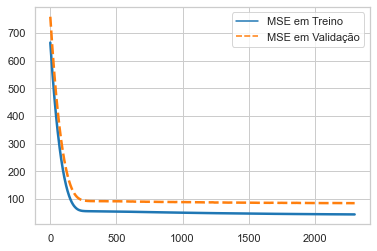

In [34]:
#Plot
sns.set(style = 'whitegrid')
sns.lineplot(data = df, palette = 'tab10', linewidth = 2.5)

mse - quanto menor melhor

O ideal é que o mse e o val_mse sejam próximos

In [37]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

In [38]:
#Imprime as previsões
previsoes

array([20.92704 , 18.458313, 23.919983, 21.341537, 20.597874, 20.695404,
       24.529541, 21.932816, 21.085526, 20.890465, 25.876675, 23.444523,
       21.29887 , 22.74353 , 23.273846, 21.64022 , 27.040936, 23.37138 ,
       29.534039, 19.994408, 20.463772, 21.030663, 19.262936, 20.92704 ,
       19.0313  , 23.529865, 22.889824, 14.35597 , 17.269669, 35.37973 ,
       21.51831 , 18.293732, 20.043175, 22.822773, 31.661407, 24.334484,
       21.835281, 28.083282, 25.779144, 32.331924, 27.650494, 30.716587,
       32.197823, 17.269669, 23.08488 , 23.29823 , 18.421741, 23.572533,
       37.38519 , 35.519928, 18.220585, 34.90427 , 31.210331, 25.93763 ,
       23.663967, 22.822773, 26.150974, 27.900414, 24.74289 , 24.358864,
       23.194603, 19.122738, 23.432331, 22.828869, 21.128193, 20.262615,
       21.262295, 22.194923, 21.676796, 21.585361, 27.095795, 24.858707,
       10.954618, 14.075571, 17.18433 , 23.37138 , 17.568356, 18.043816,
       23.407948, 21.530502, 20.268711, 25.9803  , 